In [13]:
from gensim.summarization import summarize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk

# Ensure you have the NLTK stopwords downloaded
nltk.download('stopwords')

# Original text
text = """
Natural language processing (NLP) is a field of artificial intelligence that focuses on the interaction 
between computers and humans through natural language. The ultimate objective of NLP is to enable 
computers to understand, interpret, and generate human language in a way that is both valuable and 
meaningful. NLP is used to apply algorithms to identify and extract the natural language rules such that 
the unstructured language data is converted into a form that computers can understand.

"""

# Generate summary using Gensim
summary = summarize(text, ratio=0.05)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the original text and summary into vectors
tfidf_matrix = vectorizer.fit_transform([text, summary])

# Calculate the Cosine Similarity between the original text and the summary
cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

print("Original Text:\n", text)
print("\nSummary:\n", summary)
print("\nCosine Similarity between Original Text and Summary:", cosine_sim[0][0])


Original Text:
 
Natural language processing (NLP) is a field of artificial intelligence that focuses on the interaction 
between computers and humans through natural language. The ultimate objective of NLP is to enable 
computers to understand, interpret, and generate human language in a way that is both valuable and 
meaningful. NLP is used to apply algorithms to identify and extract the natural language rules such that 
the unstructured language data is converted into a form that computers can understand.



Summary:
 

Cosine Similarity between Original Text and Summary: 0.0


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/esmaailalbarazi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Cosine Similarity between Original Text and Summary with different ratios: [0.0, 0.0, 0.5871401621406355, 0.6461946157982845, 0.6461946157982845, 0.8418540008043597, 0.8936425151302206, 0.8936425151302206, 0.9680300162747456, 0.9946170416975443, 1.0000000000000002]


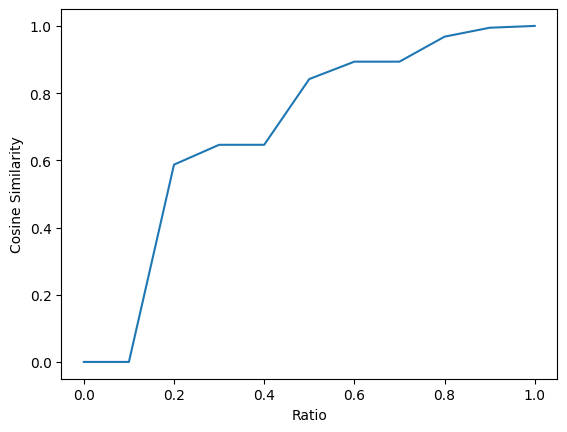

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# simmulate with ratio from 0.1 to 1.0 and save Cosine Similarity between Original Text and Summary
cosine_sim = []
vectorizer = TfidfVectorizer()

for ratio in np.arange(0, 1.1, 0.1):
    summary = summarize(text, ratio=ratio)
    tfidf_matrix = vectorizer.fit_transform([text, summary])
    cosine_sim.append(cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0])

print("\nCosine Similarity between Original Text and Summary with different ratios:", cosine_sim)

# plot similarity by ratio
plt.plot(np.arange(0, 1.1, 0.1), cosine_sim)
plt.xlabel('Ratio')
plt.ylabel('Cosine Similarity')
plt.show()
